In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
#Import main dataframe 
df = pd.read_csv('data/temp/movie_complete_df.csv.gz', compression='gzip')
# df['date'] = pd.to_datetime(df['date'])
df.head()


,adult,budget,kaggle_id,imdb_id,original_language,original_title,overview,popularity,date,revenue,...,vote_count,GENRES,COLLECTION,LANGUAGES,PRODUCER,COUNTRIES,ExPro,Directors,Writers,Actors
0,True,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,5415.0,"['Animation', 'Comedy', 'Family']",Toy Story Collection,['English'],['Pixar Animation Studios'],['United States of America'],"['Ed Catmull', 'Steve Jobs']","['John Lasseter', 'Roman Figun', 'Desirée Mour...","['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Tom Hanks', 'Tim Allen', 'Don Rickles']"
1,True,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,2413.0,"['Adventure', 'Fantasy', 'Family']",NaN,"['English', 'Français']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['Larry J. Franco', 'Ted Field', 'Robert W. Co...",['Joe Johnston'],"['Jonathan Hensleigh', 'Chris van Allsburg', '...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,True,16000000,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,...,34.0,"['Comedy', 'Drama', 'Romance']",NaN,['English'],['Twentieth Century Fox Film Corporation'],['United States of America'],['Terry McMillan'],['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan', 'Terry McMil...","['Whitney Houston', 'Angela Bassett', 'Loretta..."
3,True,60000000,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,...,1886.0,"['Action', 'Crime', 'Drama', 'Thriller']",NaN,"['English', 'Español']","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],"['Pieter Jan Brugge', 'Arnon Milchan']","['Michael Mann', 'Cate Hardman', 'Michael Waxm...",['Michael Mann'],"['Al Pacino', 'Robert De Niro', 'Val Kilmer']"
4,True,35000000,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,1995-12-22,64350171.0,...,174.0,"['Action', 'Adventure', 'Thriller']",NaN,['English'],"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],[],['Peter Hyams'],"['Karen Elise Baldwin', 'Gene Quintano']","['Jean-Claude Van Damme', 'Powers Boothe', 'Do..."


In [33]:
df['BUDGET_MIL'] = df['budget'] / 1000000
df['REVENUE_MIL'] = df['revenue'] / 1000000

In [36]:
df['PROFIT'] = ((df['REVENUE_MIL'] - df['BUDGET_MIL'])* df['REVENUE_MIL'])/(df['BUDGET_MIL']**2)
df['PROFIT'].describe()

count    5.322000e+03
mean     3.590103e+04
std      2.290465e+06
min     -2.500000e-01
25%     -4.241670e-02
50%      2.200818e+00
75%      1.373449e+01
max      1.661492e+08
Name: PROFIT, dtype: float64

Text(0, 0.5, 'Revenue in $million')

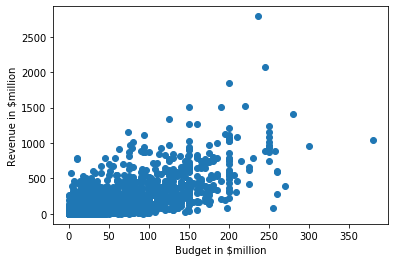

In [37]:
plt.scatter(df.BUDGET_MIL, df.REVENUE_MIL);
plt.xlabel('Budget in $million')
plt.ylabel('Revenue in $million')
# df_money.PROFIT.value_counts()

Text(0, 0.5, 'Profit')

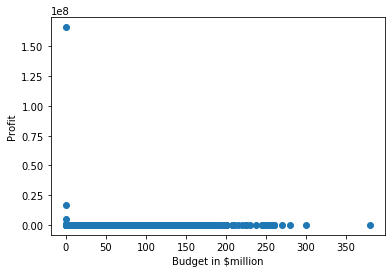

In [38]:
plt.scatter(df.BUDGET_MIL, df.PROFIT);
plt.xlabel('Budget in $million')
plt.ylabel('Profit')

In [50]:
df_genres = df.groupby(df.LANGUAGES).mean()
df_genres.head()

,adult,budget,kaggle_id,popularity,revenue,runtime,video,vote_avg,vote_count,BUDGET_MIL,REVENUE_MIL,PROFIT
LANGUAGES,,,,,,,,,,,,
"['', 'Deutsch', 'English']",True,70000000.0,5137.000000,9.641130,5.795870e+07,107.0,False,5.700000,445.0,70.00,57.958696,-0.142428
"['', 'English', 'Français', 'Tiếng Việt']",True,31500000.0,28.000000,13.596300,8.946038e+07,153.0,False,8.000000,2112.0,31.50,89.460381,5.225657
"['', 'English', 'Français']",True,1500000.0,23963.000000,6.407207,3.200000e+04,93.0,False,6.600000,187.0,1.50,0.032000,-0.020878
"['', 'English']",True,56350000.0,88237.166667,10.775685,2.024872e+08,112.5,False,6.683333,1639.5,56.35,202.487241,24.809291
"['', 'Italiano', '', 'English']",True,14000000.0,379.000000,7.495853,5.080409e+06,115.0,False,7.500000,431.0,14.00,5.080409,-0.231200
